<a href="https://colab.research.google.com/github/maushmirajesh/Nissan-Industrial-Elective-Microproject/blob/main/microproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert" style="background-color:#abc; color:white; padding:0px 10px; border-radius:3px;"><h3 style='margin:10px 10px; font-size:10px'> This work is licensed under the Creative Commons License <a href="https://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>. This can be shared for educational purposes, with due credits to machinelearningplus.com</h3>
</div>

<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Machine Learning Project Template</h1>
</div>

Just learning the concepts and theory is not sufficient to ace in machine learning. You need to implement the concepts and try to solve more practical problems.

In this notebook, you will learn how to implement machine learning. You will be able to kickstart your project using this template.

### Content:
1. Load the Data
  - Import libraries
  - Load the datasets
  
2. Overview of the Data
  - Descriptive Statistics
  - Missing Values
  
3. Exploratory Data Analysis
  - Create list of columns by data type
  - Check the distribution of target class
  - Check the distribution of every feature
  - Check how differnt numerical features are realated to target class
  
4. Data Preparation
  - Data Cleaning
  - Feature Encoding
  - Split X & y
  - Feature Scaling
  - Train Test split
  
5. Model Building
  - Train Model
  - Model Prediction
  - Model Evaluation
  
7. Improve Model
  - Handle Class Imbalance
  - Hyperparameter Tuning
  - Save the Final Model

## Inputs

The notebook is designed in such a way that you just need to plug in the input values given below and run the code. It will run on it's own and will build the model as well.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Load the Data</h2>
</div>

In this section you will:

- Import the libraries
- Load the dataset

### 1.1. Import Libraries

Import all the libraries in the first cell itself

In [ ]:
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### 1.2. Load the datasets

Load the dataset using pd.read_csv()

In [ ]:
# Read data in form of a csv file
df = pd.read_csv('spam.csv',encoding='latin-1')

# First 5 rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Overview of the Data</h2>
</div>

Before attempting to solve the problem, it's very important to have a good understanding of data.

In this section you will:
- Get the descriptive statistics of the data
- Get the information about missing values in the data

### 2.1. Descriptive Statistics

As the name says descriptive statistics describes the data. It gives you information about
- Mean, median, mode
- Min, max
- Count etc

Let's understand the data we have

In [ ]:
# Dimension of the data
df.shape

(5572, 5)

In [ ]:
# Summary of the dataset
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### 2.2 Missing Values

Get the info about missing values in the dataframe

In [ ]:
# Missing values for every column
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Exploratory Data Analaysis</h2>
</div>

Exploratory data analysis is an approach to analyze or investigate data sets to find out patterns and see if any of the variables can be useful in predicting the y variables. Visual methods are often used to summarise the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.

In this section you will:
- Create list of columns by data type
- Check the distribution of target class
- Check the distribution of every feature
- Check how differnt numerical features are realated to target class

### 3.1. Extract data types of columns

It's better to get the list of columns by data types in the start itself. You won't have to manually write the name of columns while performing certain operations. So always get the list of columns in the start itself.

In [ ]:
# Get the list of numeric and categorical columns according to the input


binary_columns = [col for col in df.columns if df[col].nunique() == 2]
print("Binary Columns : ", binary_columns)
categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
print("Categorical Columns : ", categorical_columns)
categorical_columns = binary_columns + categorical_columns
categorical_columns = list(set(categorical_columns))
numerical_columns = [col for col in df.columns if col not in categorical_columns]
print("Numerical Columns : ", numerical_columns)



Binary Columns :  ['labels']
Categorical Columns :  ['labels', 'message']
Numerical Columns :  []


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(5169, 2)

**Note :** There might be some mismatch in the data type of the columns, so in such cases you will have to correct it manually

### 3.2 Check distribution of target class

You need to check the distribution of target class, see how many categories are there, is it balanced or not

### 3.3. Check the distribution of every feature

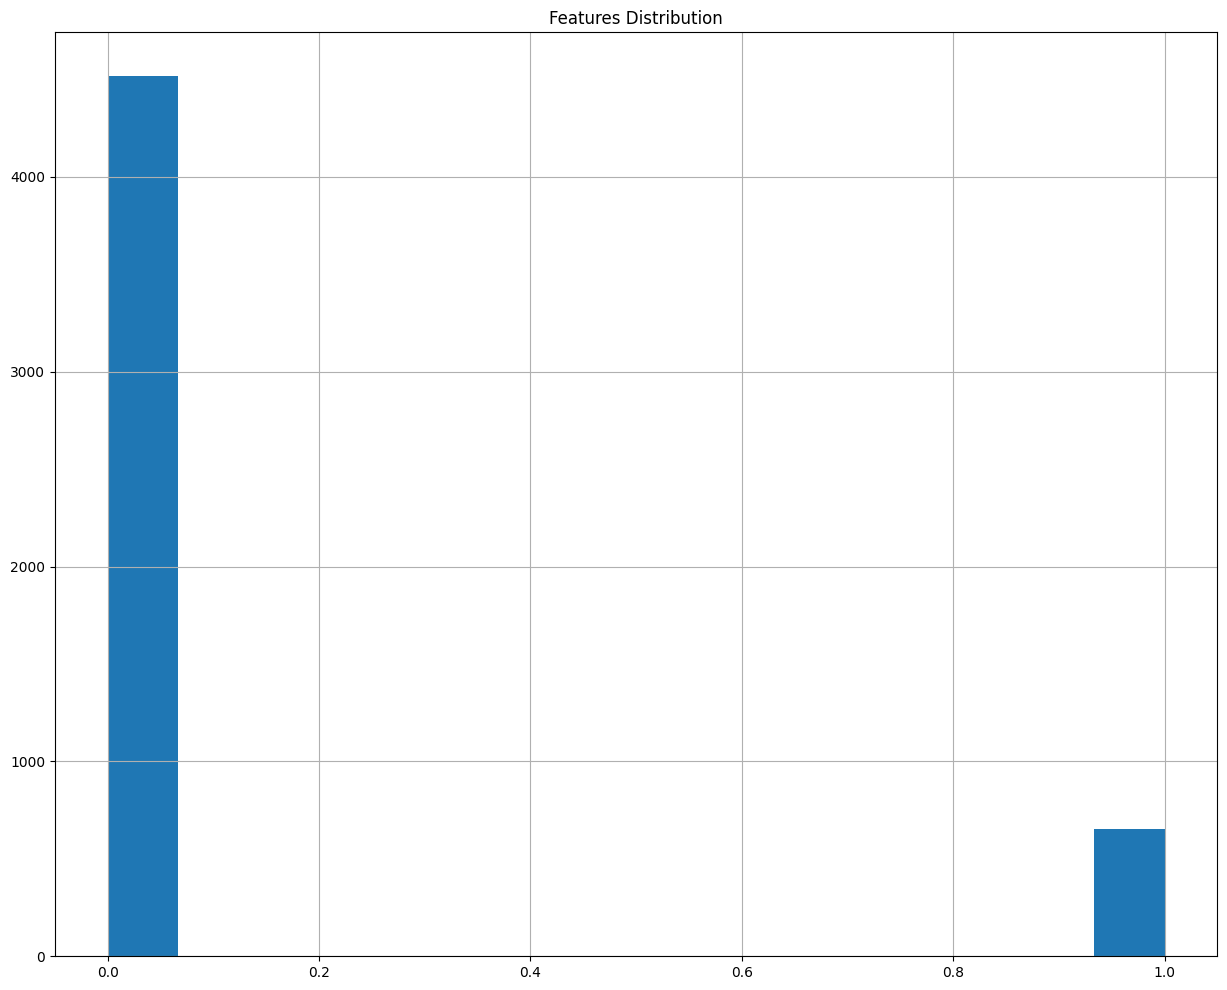

In [ ]:
# Check the distribution of all the features
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

### 3.4 Check how differnt numerical features are realated to target class

In [ ]:
# Number of rows and columns in the plot
n_cols = 3
n_rows = math.ceil(len(numerical_columns)/n_cols)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Data Preparation</h2>
</div>

The data is not yet ready for model building. You need to process the data and make it ready for model building

In this section you will:
- Clean the data
- Encode the categorical features
- Split the dataset in X and y dataset
- Scale the features
- Split the data in train and test set

### 4.1. Data Cleaning

Machine Learning works on the idea of garbage in - garbage out. If you feed in dirty data, the results won't be good. Hence it's very important to clean the data before training the model.

**Sklearn algorithms need missing value imputation but XGBoost, LightGBM etc does not require missing value imputation**

There are various ways to handle missing values. Some of the ways are:
- Drop the rows with missing values
- Impute the missing values with mean, median, mode, most frequent category, unknown category etc

Here you can decide how you want to handle the missing data

In [ ]:
import string

def preprocess_text(message):

    # Check characters to see if they are in punctuation
    without_punc = [char for char in message if char not in string.punctuation]

    # Join the characters again to form the string.
    without_punc = ''.join(without_punc)

    # Now just remove any stopwords
    return [word for word in without_punc.split() if word.lower() not in stopwords.words('english')]
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
df['message'].head().apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
df.head()

,labels,message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


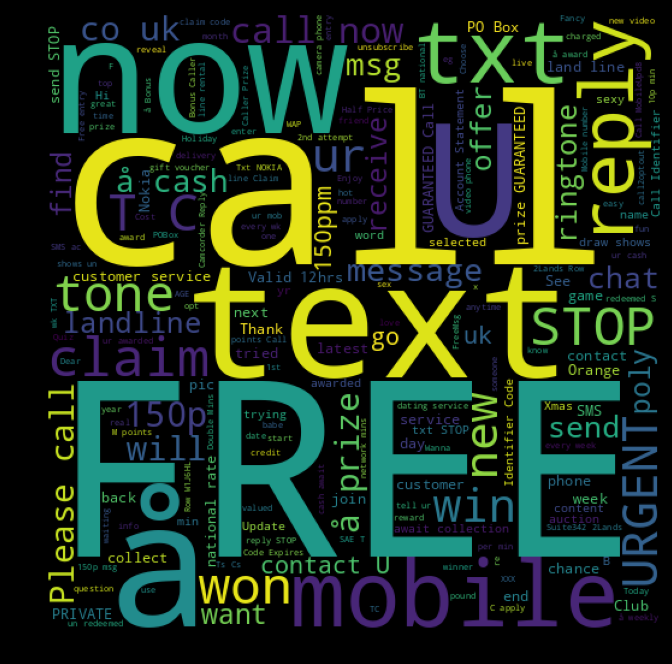

In [ ]:
from wordcloud import WordCloud

spam_words = ' '.join(list(df[df['label'] == 1]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.show()

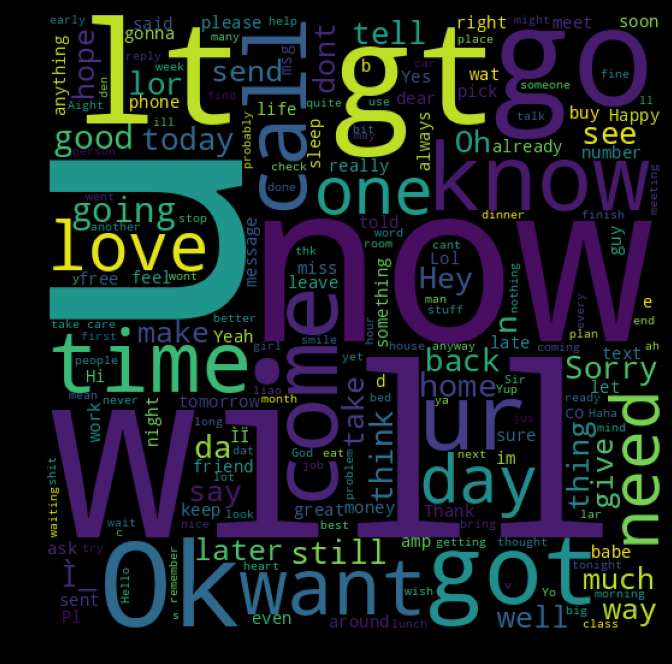

In [ ]:
from wordcloud import WordCloud

ham_words = ' '.join(list(df[df['label'] == 0]['message']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
x = df['message']
y = df['label']
cv = CountVectorizer()
x= cv.fit_transform(x)

### 4.2. Feature Encoding

Encoding is the process of converting data from one form to another. Most of the Machine learning algorithms can not handle categorical values unless we convert them to numerical values. Many algorithm’s performances vary based on how Categorical columns are encoded.

There are lot of ways in which you can encode the categorical variables. Some of those are:
- Label Encoding
- One Hot Encoding
- Ordinal Encoding
- Frequency Encoding

In [ ]:
categorical_columns

['message', 'labels']

### 4.3. Split X and y

Split the X and y dataset

### 4.4. Feature Scaling

It is a technique to standardize the x variables (features) present in the data in a fixed range. It needs to be done before training the model.

But if you are using tree based models, you should not go for feature scaling

### 4.5 Train - Test Split

Split the dataset in training and test set

In [ ]:
# Split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Model Building</h2>
</div>

In this section you will:
- Train the model on training data
- Get the predictions on testing data
- Evaluate the performance of model on testing data

### 5.1 Train Model

Train the model on training data

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(x_train, y_train)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(x_train, y_train)

### 5.2 Model Predictions

Get the predictions from the model on testing data

In [ ]:
# print the predictions
print(classifier.predict(x_test))

# print the actual values
print(y_test.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:
def sms(text):

    # creating a list of labels
    lab = ['not spam','spam']

    # perform tokenization
    x = cv.transform(text).toarray()

    # predict the text
    p = classifier.predict(x)

    # convert the words in string with the help of list
    s = [str(i) for i in p]
    a = int("".join(s))

    # show out the final result
    res = str("This message is looking: "+ lab[a])
    print(res)

In [ ]:
check = input()
sms([check])

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
This message is looking: spam


### 5.3. Model Evaluation

Get the evaluation metrics to evaluate the performance of model on testing data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(x_test)
report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)

# Display the confusion matrix and accuracy
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9777562862669246

Confusion Matrix:
 [[872  13]
 [ 10 139]]


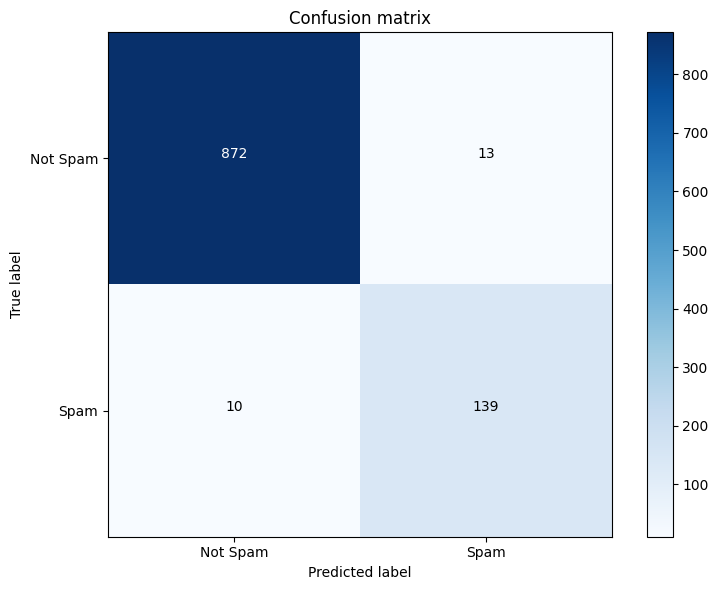

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Not Spam', 'Spam'])
plt.yticks(tick_marks, ['Not Spam', 'Spam'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Improve Model</h2>
</div>

The first model you make may not be a good one. You need to improve the model.

In majority of the classification problems, the target class is imbalanced. So you need to balance it in order to get best modelling results.

In this section you will:
- Handle class imbalance
- Save the final model

In [ ]:
# Define the function to build model on balanced dataset
def classification_model(X, y):

    scaled_X = scale_data(X)

    # Split the dataset into the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)

    # Training the model:
    model.fit(X_train, y_train)

    # Predict class for test dataset
    y_pred = model.predict(X_test)

    # Predict probability for test dataset
    y_pred_prod = model.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]

    # Compute Evaluation Metric
    compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)

    return model

### 6.1 Handle Class Imbalance

Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class.

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

Here, you will upsample the minority class

### 6.2. Hyperparameter Tuning

**Hyperparameter** is a parameter whose value is set before the learning process begins

**Hyperparameter tuning** refers to the automatic optimization of the hyper-parameters of a ML model

- Select the parameter grid according to the input provided

In [ ]:
# Define the parameters gird for decision tree
param_grid_decision_tree = {'criterion': ['gini', 'entropy'],
                            'max_depth': [10,15,20,30,40,50],
                            'min_samples_leaf' : [1,2,5]
                           }

# Define the parameters gird for random forest
param_grid_random_forest = {'max_depth'   : [10,20,40],
                            'n_estimators' : [100,200,300],
                            'min_samples_leaf' : [1,2,5]
                           }

# Define the parameters gird for XGBoost
param_grid_xgb = {'min_child_weight': [1, 5, 10],
                  'gamma': [0, 1],
                  'max_depth': [5,10],
                  'learning_rate' : [0.05,0.1]
                 }

# Define the parameters gird for LGBM
param_grid_lgbm = {'n_estimator':[100,200],
                   'num_leaves': [256,128],
                   'max_depth': [5, 8, 10],
                   'learning_rate': [0.05, 0.1]
                  }

### 6.3. Save the final model

You can save the model in local disk and use it whenever you want

<div class="alert" style="background-color:#abc; color:white; padding:0px 10px; border-radius:3px;"><h3 style='margin:10px 10px; font-size:10px'> This work is licensed under the Creative Commons License <a href="https://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>. This can be shared for educational purposes, with due credits to machinelearningplus.com</h3>
</div>